*Decision tree*

In [1]:
import numpy as np
from matplotlib.pylab import rcParams
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

In [2]:
"load data set"
df = pd.read_csv('additional_co2_new.csv')
df = df.dropna(how='any',axis=1)
df.columns

Index(['Unnamed: 0', 'country', 'year', 'cement_co2_per_capita',
       'coal_co2_per_capita', 'flaring_co2_per_capita', 'gas_co2_per_capita',
       'oil_co2_per_capita',
       'PM2.5 air pollution - mean annual exposure (micrograms per cubic meter)',
       'Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)',
       'rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)',
       'category'],
      dtype='object')

In [3]:
"in order to estimate the death rates, we round the actual death rates to 5 (by choice)."
def round_5(x, base=5):
    return base * round(x/base)

df['rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'] = round_5(df['rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'], base=5)

In [4]:
df.head()

,Unnamed: 0,country,year,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,PM2.5 air pollution - mean annual exposure (micrograms per cubic meter),Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),category
0,0,Africa,1990,0.036,0.472,0.033,0.121,0.390,46.719096,169060,25.0,Africa
1,1,Africa,1991,0.038,0.475,0.032,0.122,0.401,46.530559,173284,25.0,Africa
2,2,Africa,1992,0.038,0.436,0.035,0.112,0.389,46.342022,177903,25.0,Africa
3,3,Africa,1993,0.036,0.469,0.032,0.120,0.386,46.153485,183152,25.0,Africa
4,4,Africa,1994,0.036,0.473,0.031,0.122,0.367,45.964949,188664,25.0,Africa


In [5]:
# Convert the country names to a digit (0, 1, 2) for each class.
df['country'] = pd.factorize(df['country'])[0]
df.head(90)

,Unnamed: 0,country,year,cement_co2_per_capita,coal_co2_per_capita,flaring_co2_per_capita,gas_co2_per_capita,oil_co2_per_capita,PM2.5 air pollution - mean annual exposure (micrograms per cubic meter),Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),category
0,0,0,1990,0.036,0.472,0.033,0.121,0.390,46.719096,169060,25.0,Africa
1,1,0,1991,0.038,0.475,0.032,0.122,0.401,46.530559,173284,25.0,Africa
2,2,0,1992,0.038,0.436,0.035,0.112,0.389,46.342022,177903,25.0,Africa
3,3,0,1993,0.036,0.469,0.032,0.120,0.386,46.153485,183152,25.0,Africa
4,4,0,1994,0.036,0.473,0.031,0.122,0.367,45.964949,188664,25.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,3,1991,0.122,4.540,0.134,2.908,6.060,9.528191,109722,25.0,North America
86,86,3,1992,0.122,4.542,0.135,2.969,6.112,9.501610,109047,25.0,North America
87,87,3,1993,0.126,4.605,0.134,3.006,6.079,9.475030,111159,25.0,North America
88,88,3,1994,0.134,4.588,0.134,3.041,6.154,9.448450,111941,25.0,North America


In [6]:
"split the set in training and test data. 60% training data is relatively low, but the classification still gives reasonable results"
df['is_train'] = np.random.uniform(0, 1, len(df)) <= 0.60
df.head()

train_df = df[df['is_train']]
test_df  = df[~df['is_train']]

print('Length of train data:', len(train_df))
print('Length of test data :', len(test_df))

Length of train data: 69
Length of test data : 43


In [7]:
"selecting the feature columns from the data set."
features = df.columns[3:-4]
features

Index(['cement_co2_per_capita', 'coal_co2_per_capita',
       'flaring_co2_per_capita', 'gas_co2_per_capita', 'oil_co2_per_capita',
       'PM2.5 air pollution - mean annual exposure (micrograms per cubic meter)'],
      dtype='object')

In [8]:
"selecting the target column from our data set"
targets  = df.columns[-3]
targets
#print(df['oil_co2'])

'rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'

In [9]:
"construct and train the tree"
clf = DecisionTreeClassifier()
clf.fit(train_df[features], train_df[targets])

DecisionTreeClassifier()

In [10]:
"use trained model to make predictions on the test set"
clf.predict(test_df[features])

array([25., 25., 30., 25., 30., 30., 30., 30., 30., 40., 40., 45., 40.,
       40., 40., 55., 55., 55., 55., 55., 55., 70., 70., 85., 90., 80.,
       75., 70., 70., 60., 65., 25., 25., 25., 25., 25., 20., 20., 20.,
       25., 15., 10., 10.])

In [11]:
clf.predict_proba(test_df[features])

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,

In [12]:
# predict_proba = clf.predict(test_df[features])
# pd.crosstab(test_df['country'],
#             predict_proba,
#             rownames=['Actual Country'],
#             colnames=['Predicted Country'])

In [13]:
"see which sources of co2 are most important for classification in our model"
fi = pd.DataFrame(clf.feature_importances_,
                  index=df.columns[3:-4],
                  columns=['rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'])
fi_sorted = fi.sort_values('rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)', ascending=False)
fi_sorted

# AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

,rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)
coal_co2_per_capita,0.335571
cement_co2_per_capita,0.211225
PM2.5 air pollution - mean annual exposure (micrograms per cubic meter),0.165500
gas_co2_per_capita,0.129863
oil_co2_per_capita,0.096419
flaring_co2_per_capita,0.061422


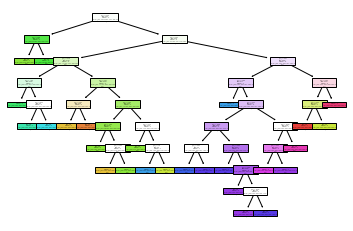

In [14]:
rcParams['figure.figsize'] = 80,50
tree_fig = plot_tree(clf, filled=True)
#plt.savefig('DT.png',format='png',dpi=800)

In [15]:
"confusion matrix"
predicted_rate = clf.predict(test_df[features])
print(pd.crosstab(test_df['rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'],
            predicted_rate,
            rownames=['Actual quality'],
            colnames=['Predicted quality']))

Predicted quality  10.0  15.0  20.0  25.0  30.0  40.0  45.0  55.0  60.0  65.0  \
Actual quality                                                                  
10.0                  2     0     0     0     0     0     0     0     0     0   
15.0                  0     1     1     1     0     0     0     0     0     0   
20.0                  0     0     2     0     0     0     0     0     0     0   
25.0                  0     0     0     6     0     0     0     0     0     0   
30.0                  0     0     0     2     6     0     0     0     0     0   
40.0                  0     0     0     0     0     2     0     0     0     0   
45.0                  0     0     0     0     0     1     1     0     0     0   
50.0                  0     0     0     0     0     2     0     0     0     0   
55.0                  0     0     0     0     0     0     0     2     0     0   
60.0                  0     0     0     0     0     0     0     3     1     1   
65.0                  0     

in case the matrix is too large, run this cell again. have to be able to see the numbers in the cells. i do not know why the size does not always correspond to the values given


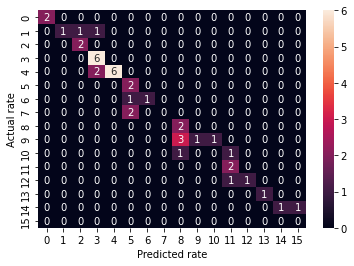

In [16]:
cm = confusion_matrix(test_df['rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'],predicted_rate)
print('in case the matrix is too large, run this cell again. have to be able to see the numbers in the cells. i do not know why the size does not always correspond to the values given')
plt.figure()
rcParams['figure.figsize'] = 5,5
sn.heatmap(cm, annot=True, fmt='g')
plt.xlabel("Predicted rate")
plt.ylabel("Actual rate")
#plt.savefig('DT_cm.png',format='png',dpi=300)
plt.show()